In [1]:
import n2

import numpy
import astroquery.skyview
from astropy.units import deg
from astropy.units import arcmin
from astropy.units import km
from astropy.units import s

%matplotlib inline
import matplotlib.pyplot

[16:37:20,471] INFO: python 3.6.5
[16:37:20,472] INFO: n2-tools 0.0.7


In [2]:
# using FUGIN data
# see https://nro-fugin.github.io/
#  ! caution !  file size is too large 1.24 GB
d = n2.open_fits('http://jvo.nao.ac.jp/skynode/do/download/nobeyama/fugin/fugin_meta/FGN00000036')

[16:37:20,981] INFO: (open_fits) path=http://jvo.nao.ac.jp/skynode/do/download/nobeyama/fugin/fugin_meta/FGN00000036, hdu_num=0


In [3]:
d.info()

OBS : NRO45m / FOREST
LINE : 12CO1-0 (K)
HPBW : 20.2 x 20.2 arcsec

size : 1.3 GB
BITPIX : -32

Center : 14.999 deg  0.001 deg  50475.000 m / s
Width : 2.002 deg  2.002 deg  300300.000 m / s

Number of WCS axes: 3
CTYPE : 'GLON-SFL'  'GLAT-SFL'  'VRAD'  
CRVAL : 15.0  0.0  -99675.0  
CRPIX : 424.5  424.5  1.0  
NAXIS : 848  848  462


In [4]:
d2 = d.cut_world(x=(15.4*deg, 14.8*deg), y=(-0.9*deg, -0.4*deg), z=(0*km/s, 30*km/s))

[16:37:21,920] INFO: (cut_world) x=(<Quantity 15.4 deg>, <Quantity 14.8 deg>), y=(<Quantity -0.9 deg>, <Quantity -0.4 deg>), z=(<Quantity 0. km / s>, <Quantity 30. km / s>)
[16:37:21,921] DEBUG: (cut_world) original shape : (462, 848, 848)
[16:37:21,922] INFO: (cut_world) start calculation
[16:37:22,828] DEBUG: (cut_world_xy) pix range : x=[254, 508], y=[42, 254]
[16:37:22,836] DEBUG: (cut_world_z) pix range : z=[153, 199]
[16:37:22,839] INFO: (cut_world) done
[16:37:22,840] DEBUG: (cut_world) result shape : (46, 212, 254)
[16:37:23,420] DEBUG: (cache.make_cache_dir)
[16:37:23,421] INFO: (cache.save) .n2cache/b6ceaf4bb0a79c583fd4101032067838faca9c14


In [5]:
d2.info()

OBS : NRO45m / FOREST
LINE : 12CO1-0 (K)
HPBW : 20.2 x 20.2 arcsec

size : 9.9 MB
BITPIX : -32

Center : 15.100 deg  -0.650 deg  14725.000 m / s
Width : 0.600 deg  0.501 deg  29900.000 m / s

Number of WCS axes: 3
CTYPE : 'GLON-SFL'  'GLAT-SFL'  'VRAD'  
CRVAL : 15.0  0.0  -99675.0  
CRPIX : 170.5  382.5  -152.0  
NAXIS : 254  212  46


In [6]:
blue = d2.cut_world(z=(9.5*km/s, 17.5*km/s))

[16:37:26,321] INFO: (cut_world) x=None, y=None, z=(<Quantity 9.5 km / s>, <Quantity 17.5 km / s>)
[16:37:26,322] DEBUG: (cut_world) original shape : (46, 212, 254)
[16:37:26,323] INFO: (cut_world) start calculation
[16:37:26,335] DEBUG: (cut_world_z) pix range : z=[14, 27]
[16:37:26,340] INFO: (cut_world) done
[16:37:26,341] DEBUG: (cut_world) result shape : (13, 212, 254)
[16:37:26,353] INFO: (cache.save) .n2cache/258d00e9b24400e9daf10237ce96f344012fe283


In [7]:
b = blue.mom0()

[16:37:26,960] DEBUG: (mom0) original bunit : K
[16:37:26,961] DEBUG: (mom0) original cunit3 : m / s
[16:37:26,962] INFO: (mom0) start calculation
[16:37:26,966] INFO: (mom0) done
[16:37:26,968] DEBUG: (mom0) new bunit : K km / s
[16:37:26,993] INFO: (cache.save) .n2cache/7edf598f964891e4c3480f07849682f5c32a8afd


In [8]:
red = d2.cut_world(z=(21.5*km/s, 29.5*km/s))

[16:37:28,985] INFO: (cut_world) x=None, y=None, z=(<Quantity 21.5 km / s>, <Quantity 29.5 km / s>)
[16:37:28,986] DEBUG: (cut_world) original shape : (46, 212, 254)
[16:37:28,988] INFO: (cut_world) start calculation
[16:37:29,006] DEBUG: (cut_world_z) pix range : z=[33, 45]
[16:37:29,010] INFO: (cut_world) done
[16:37:29,011] DEBUG: (cut_world) result shape : (12, 212, 254)
[16:37:29,022] INFO: (cache.save) .n2cache/6d94ea03354e8c55f3f2bc95761672bd84abcbf1


In [9]:
r = red.mom0()

[16:37:29,725] DEBUG: (mom0) original bunit : K
[16:37:29,726] DEBUG: (mom0) original cunit3 : m / s
[16:37:29,727] INFO: (mom0) start calculation
[16:37:29,731] INFO: (mom0) done
[16:37:29,732] DEBUG: (mom0) new bunit : K km / s
[16:37:29,755] INFO: (cache.save) .n2cache/e27fe2b0f4f7a36a12d8d07818df6c15024acbd9


In [10]:
img = n2.jpy_red_blue_image(r.data, b.data)
img

Image(value=b'BM\x86\x8d\t\x00\x00\x00\x00\x006\x00\x00\x00(\x00\x00\x00\xa1\x01\x00\x00\xf4\x01\x00\x00\x01\x…

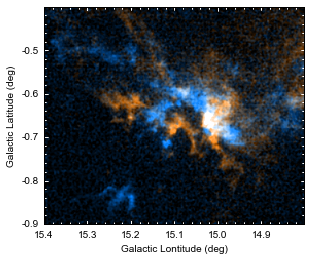

In [11]:
matplotlib.rcParams['xtick.color'] = 'w'
matplotlib.rcParams['ytick.color'] = 'w'

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection=r.wcs)
ax.imshow(img.get_image())
ax.set_xlim(0, r.data.shape[1])
ax.set_ylim(0, r.data.shape[0])
ax.coords[0].set_axislabel('Galactic Lontitude (deg)')
ax.coords[0].set_major_formatter('d.d')
ax.coords[0].set_ticks(spacing=0.1*deg)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].set_axislabel('Galactic Latitude (deg)')
ax.coords[1].set_major_formatter('d.d')
ax.coords[1].set_ticks(spacing=0.1*deg)
ax.coords[1].display_minor_ticks(True)
fig.savefig('plot-red-blue-image.jpg', dpi=50)